<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/LEER_URL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
from pylab import *

In [ ]:
def leer_pagina(url): 

  header = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36","X-Requested-With": "XMLHttpRequest"}

  r = requests.get(url, headers=header)
  dfs = pd.read_html(r.text)
  # dfs=dfs[-2]
  # dfs.columns=dfs.loc[0]
  # dfs=dfs[1:].iloc[:,1:]
  return(dfs)

In [ ]:
tablas=leer_pagina("https://www.nasdaq.com/market-activity/stocks/screener")

In [ ]:
datos=pd.read_csv("nasdaq_screener_1643151171388.csv")

In [ ]:
nas100=datos.sort_values("Market Cap",ascending=False)[0:101].reset_index()

In [ ]:
sectores=nas100.Sector.unique()

In [ ]:
part_sectores=nas100.Sector.value_counts()

In [ ]:
part_sectores

Technology               20
Health Care              16
Consumer Services        13
Finance                  12
Consumer Non-Durables     9
Capital Goods             8
Energy                    5
Miscellaneous             5
Public Utilities          3
Basic Industries          3
Transportation            2
Name: Sector, dtype: int64

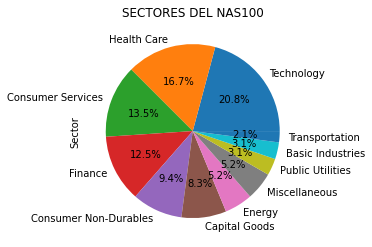

In [ ]:
part_sectores.plot(kind="pie",title="SECTORES DEL NAS100",  autopct='%1.1f%%')

In [ ]:
total_market=nas100["Market Cap"].sum()

In [ ]:
porcentaje_participacion=100*nas100["Market Cap"]/total_market

In [ ]:
el_porcentaje=nas100.iloc[:,[1,6]]

In [ ]:
el_porcentaje["paricipacion"]=porcentaje_participacion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
el_porcentaje[0:10]

pandas.core.frame.DataFrame